In [29]:
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
import json

prediction_file = '../expr_result/im2caption_chinese_res50withgcb/predict/_2021-12-31_09-37-52/results.txt'
gt_file = '../../im2caption_data/chinese_caption/ai_challenger_caption_validation_20170910/caption_validation_annotations_20170910.json'
with open(gt_file,'r')as f:
    gt_data = json.load(f)
with open(prediction_file,'r')as f:
    pred_data = f.readlines()

gt_dict ={}
for item in gt_data:
    image_name = item['image_id']
    captions = item['caption']
    caption_list = []
    for caption in captions:
        temp = []
        for token in caption:
            temp.append(token)
        caption_list.append(temp)
    gt_dict[image_name] = caption_list

pred_dict = {}
for item in pred_data:
    item_list = item.split(' ')
    file_name = item_list[0]
    pred = item_list[1:-2]
    pred_dict[file_name] = pred

In [40]:
index = 1003
pred_name_list = []
for item in pred_dict.keys():
    pred_name_list.append(item)
image_name = pred_name_list[index]
pred_result = pred_dict[image_name]
gts_result = gt_dict[image_name.split('/')[-1]]
pred_text = ''
for item in pred_result:
    pred_text += item + ' '
gts_text = ''
for gt in gts_result:
    for item in gt:
        gts_text += item + ' '
    gts_text += '\n'



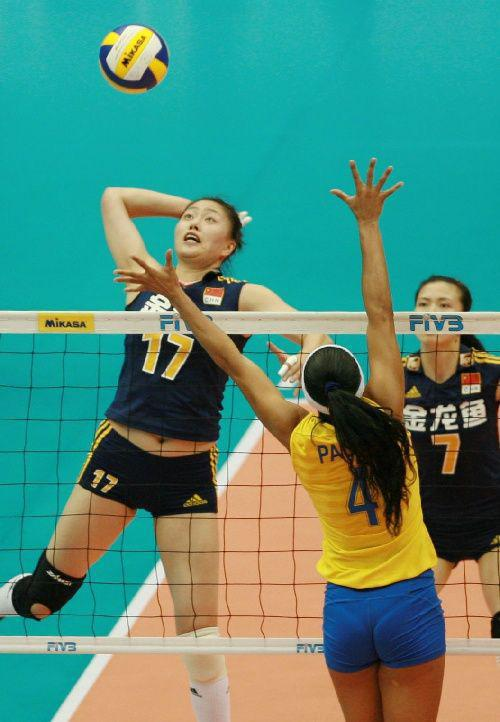

In [41]:
from IPython.display import Image as displayImage
displayImage('../'+image_name)


In [42]:
print('pred: \n',pred_text)
print('gts: \n',gts_text)
print('bleu score: ',sentence_bleu(gts_result,pred_result))

pred: 
 三 个 穿 着 球 衣 的 女 人 在 运 动 场 上 打 排 球 
gts: 
 三 个 穿 着 球 衣 的 运 动 员 在 整 洁 的 运 动 场 上 打 排 球 
球 场 上 有 三 个 穿 着 球 衣 的 人 在 打 排 球 
三 个 穿 着 球 衣 的 运 动 员 在 体 育 场 里 打 排 球 
三 个 穿 着 球 服 的 女 人 在 排 球 场 上 奋 力 地 打 排 球 
亮 堂 的 球 场 上 有 三 位 穿 着 球 服 的 女 士 在 打 排 球 

bleu score:  0.8332857102035374
